In [58]:
import torch
from torch import nn
from torch.utils import data
import torchvision
from torchvision import transforms
import numpy as np
from d2l import torch as d2l 
from IPython import display
import random
import graphviz
import matplotlib.pyplot as plt

random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)

# 3 线性神经网络

## 课后习题

### 3.1 线性回归

1. 假设我们有一些数据$x_1, \cdots, x_n \in \mathbb{R}$。我们的目标是找到一个常数$b$，使得最小化$\sum_i(x_i-b)^2$。
    - 找到最优值$b$的解析解。
    - 这个问题及其解与正态分布有什么关系?

    定义函数
    $$f=\sum_{i=1}^n(x_i-b)^2$$

    对$b$求导可得
    
    $$\frac{d}{db}f=-2(\sum_{i=1}^{n}x_i-nb)$$

    因此
    
    $$b=\bar{x}$$

    是$f$取得最小值。


    假设$x_i$服从正态分布，那么

    $$\begin{aligned}
    P(\boldsymbol{X}) &= \prod_{i=1}^{n}p(x_i) \\
    &= \prod_{i=1}^{n}\frac{1}{\sigma \sqrt{2\pi}} \exp(\frac{(x_i-u)^2}{2\sigma^2})
    \end{aligned}$$

    使用负对数似然改写

    $$ \begin{aligned}
    -\log P(\boldsymbol{X}) &= \sum_{i=1}^{n} \log(p(x_i)) \\
    &= \sum_{i=1}^{n} \log (\frac{1}{\sigma \sqrt{2\pi}} \exp(\frac{(x_i-u)^2}{2\sigma^2})) \\
    &= \sum_{i=1}^{n} \log (\frac{1}{\sigma \sqrt{2\pi}}) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2 \\
    \end{aligned}$$

    因此最小化
    
    $$\sum_i(x_i-b)^2$$

    等价于最小化负对数似然，因此当$x_i$满足正态分布，$b$就是$E(\boldsymbol{X})$。


2. 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置$b$（我们可以通过向$\boldsymbol{X}$添加所有值为1的一列来做到这一点）。

    - 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
    - 计算损失对$\boldsymbol{w}$的梯度。
    - 通过将梯度设为0、求解矩阵方程来找到解析解。
    - 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？

    线性回归模型为

    $$y=\boldsymbol{w}^\top\boldsymbol{x}+b$$
    
    其中

    $$
    \boldsymbol{w}=\begin{bmatrix}
    w_1 \\
    \vdots \\
    w_n
    \end{bmatrix} \quad, \boldsymbol{x}=\begin{bmatrix}
    x_1 \\
    \vdots \\
    x_n
    \end{bmatrix}
    $$

    令
    $$
    \boldsymbol{w}=\begin{bmatrix}
    b \\
    w_1 \\
    \vdots \\
    w_n
    \end{bmatrix} \quad, \boldsymbol{x}=\begin{bmatrix}
    1 \\
    x_1 \\
    \vdots \\
    x_n
    \end{bmatrix}
    $$

    那么线性回归的模型可以改写为

    $$y=\boldsymbol{w}^\top\boldsymbol{x}$$

    损失函数就可以改写为
    
    $$\begin{aligned}
    L(\boldsymbol{w}) &= \frac{1}{2n}\sum_{i=1}^{n}(\boldsymbol{w}^\top\boldsymbol{x}^{(i)}-y^{(i)})^2 \\
    &= \frac{1}{2n}\begin{bmatrix}
    \boldsymbol{w}^\top\boldsymbol{x}^{(1)}-y^{(1)} \cdots \boldsymbol{w}^\top\boldsymbol{x}^{(n)}-y^{(n)}
    \end{bmatrix}
    \begin{bmatrix}
    \boldsymbol{w}^\top\boldsymbol{x}^{(1)}-y^{(1)} \\
    \vdots \\
    \boldsymbol{w}^\top\boldsymbol{x}^{(n)}-y^{(n)}
    \end{bmatrix} \\
    \end{aligned}$$

    令

    $$\begin{aligned}\boldsymbol{A} &= \begin{bmatrix}
    \boldsymbol{w}^\top\boldsymbol{x}^{(1)}-y^{(1)} \cdots \boldsymbol{w}^\top\boldsymbol{x}^{(n)}-y^{(n)}
    \end{bmatrix} \\\\
    &= \begin{bmatrix} \boldsymbol{w}^\top\boldsymbol{x}^{(1)} \cdots \boldsymbol{w}^\top\boldsymbol{x}^{(n)} \end{bmatrix}-\begin{bmatrix} 
    y^{(1)} \cdots y^{(n)} \end{bmatrix}\\\\
    &= \boldsymbol{w}^\top\begin{bmatrix}\boldsymbol{x}^{(1)} \cdots \boldsymbol{x}^{(n)}\end{bmatrix}-\begin{bmatrix} y^{(1)} \cdots y^{(n)}\end{bmatrix} \\\\
    &= \boldsymbol{w}^\top\boldsymbol{X}^\top-\boldsymbol{Y}^\top
    \end{aligned}$$

    损失函数从而可以继续改写

    $$\begin{aligned}
    L(\boldsymbol{w}) &= \frac{1}{2n}\boldsymbol{A}\boldsymbol{A}^\top \\\\
    &= \frac{1}{2n}(\boldsymbol{w}^\top\boldsymbol{X}^\top-\boldsymbol{Y}^\top)(\boldsymbol{w}^\top\boldsymbol{X}^\top-\boldsymbol{Y}^\top)^\top \\\\
    &= \frac{1}{2n}(\boldsymbol{w}^\top\boldsymbol{X}^\top-\boldsymbol{Y}^\top)(\boldsymbol{X}\boldsymbol{w}-\boldsymbol{Y}) \\\\
    &= \frac{1}{2n}(\boldsymbol{w}^\top\boldsymbol{X}^\top\boldsymbol{w}\boldsymbol{X}-2\boldsymbol{w}^\top\boldsymbol{X}^\top\boldsymbol{Y}+\boldsymbol{Y}^\top\boldsymbol{Y})
    \end{aligned}$$

    对$\boldsymbol{w}$求导

    $$\begin{aligned}
    \frac{d}{d\boldsymbol{w}}L(\boldsymbol{w}) &=\frac{1}{n}\boldsymbol{X}^\top\boldsymbol{X}\boldsymbol{w}-\frac{1}{n}\boldsymbol{X}^\top\boldsymbol{Y} \\\\
    &= \frac{1}{n}(\boldsymbol{X}^\top\boldsymbol{X}\boldsymbol{w}-\boldsymbol{X}^\top\boldsymbol{Y})
    \end{aligned}$$

    如果$\boldsymbol{X}$可逆，那么解析解为

    $$\boldsymbol{w}^{*}=(\boldsymbol{X}^\top\boldsymbol{X})^{(-1)}\boldsymbol{X}^\top\boldsymbol{Y}$$

    如果$\boldsymbol{X}$可逆，并且内存满足数据集大小，那么使用解析解会更好，因为能够获取最优解，反之就可以使用梯度下降法来寻找可能的最优解。



3. 假定控制附加噪声$\epsilon$的噪声模型是指数分布。也就是说，$p(\epsilon)=\frac{1}{2}exp(-|\epsilon|)$
 
    - 写出模型$-logP(\boldsymbol{y}|\boldsymbol{X})$下数据的负对数似然。
    - 请试着写出解析解。
    - 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。

    $$p(y|\boldsymbol{x})=\frac{1}{2}exp(-|y-\boldsymbol{w}^\top\boldsymbol{x}-b|)$$

    根据极大似然估计法

    $$\begin{aligned}
    P(\boldsymbol{y}|\boldsymbol{X}) &= \prod_{i=1}^{n}p(y^{(i)}|\boldsymbol{x}^{(i)}) \\\\
    &= \prod_{i=1}^{n}(\frac{1}{2}exp(-|y^{(i)}-\boldsymbol{w}^\top\boldsymbol{x}^{(i)}-b|)) \\\\
    &= \frac{1}{2^n}exp(-\sum_{i=1}^{n}|y^{(i)}-\boldsymbol{w}^\top\boldsymbol{x}^{(i)}-b|)
    \end{aligned}$$

    得到负对数似然

    $$
    \begin{aligned}
    -logP(\boldsymbol{y}|\boldsymbol{X}) &= nlog2 + \sum_{i=1}^{n}|y^{(i)}-\boldsymbol{w}^\top\boldsymbol{x}^{(i)}-b|
    \end{aligned}
    $$

    由于负对数似然包含绝对值，是不可导的，因此没有解析解。

    损失函数为

    $$L(\boldsymbol{w}, b)=nlog2 + \sum_{i=1}^{n}|y^{(i)}-\boldsymbol{w}^\top\boldsymbol{x}^{(i)}-b|$$

    计算梯度
    $$\begin{aligned}
    \frac{\partial (L)}{\partial (\boldsymbol{w})} &= -\sum_{i=1}^{n}\boldsymbol{x}^{(i)}sign(y^{(i)}-\boldsymbol{w}^\top\boldsymbol{x}^{(i)}-b) \\\\
    
    \frac{\partial (L)}{\partial (b)} &= -\sum_{i=1}^{n}sign(y^{(i)}-\boldsymbol{w}^\top\boldsymbol{x}^{(i)}-b)
    \end{aligned}$$

    其中$sign(x)$为[符号函数](../SupervisedLearning/perceptron.ipynb)。

    下面我们以[`nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)为损失函数

    $$
    l_n=|x^{(n)}-y^{(n)}|
    $$

    看下使用梯度下降法来寻找最优解，观察损失的迭代，当`batch_size=1`时，由于每个batch都重新计算梯度，那么梯度有可能在-1和1震荡，因此`loss`也会震荡，而当`batch_size=10`时，由于每个batch都会计算平均的梯度，那么梯度可能是平滑的下降，因此`loss`会收敛。

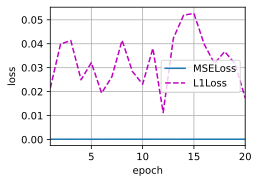

In [63]:
class DummyAnimator(d2l.Animator):
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5), fig = None, ax: d2l.plt.Axes = None):
        if not fig:
            return super().__init__(xlabel, ylabel, legend, xlim, ylim, xscale, yscale, fmts, nrows, ncols)
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig = fig
        if ax:
            self.axes = [ax]
        else:
            self.axes = self.fig.add_subplot(nrows, ncols)
            if nrows * ncols == 1:
                self.axes = [self.axes]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def init_plot_data(self, n):
        if not self.X:
            self.X = []
        if not self.Y:
            self.Y = []
        if n > len(self.X):
            self.X += [[] for _ in range(n - len(self.X))]
        if n > len(self.Y):
            self.Y += [[] for _ in range(n - len(self.Y))]
    
    def add_with_index(self, x, y, i):
        self.init_plot_data(i + 1)
        # print("after init:", i, len(X))
        self.X[i].append(x)
        self.Y[i].append(y)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
num_epochs = 20
animator = DummyAnimator(xlabel="epoch", ylabel="loss", xlim=[1, num_epochs], legend=["MSELoss", "L1Loss"])
batch_size = 1
data_iter = d2l.load_array((features, labels), batch_size)
net = nn.Sequential(nn.Linear(2, 1))
    
def linear_regression_train(loss, idx):
    for module in net.modules():
        for param in module.parameters():
            param.data.fill_(0)
    trainer = torch.optim.SGD(net.parameters(), lr=0.02)
    for epoch in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X) ,y)
            trainer.zero_grad()
            l.backward()
            trainer.step()
        l = loss(net(features), labels)
        animator.add_with_index(epoch + 1, l.item(), idx)

loss_fns = [nn.MSELoss(), nn.L1Loss()]
for i, loss in enumerate(loss_fns):
    linear_regression_train(loss, i)

## 3.2 线性回归的从零开始实现

1. 如果我们将权重初始化为零，会发生什么。算法仍然有效吗？

    如下还是能够学习的，但是对于多层的神经网络，如果权重所有神经元的权重都初始化为0，那么每层学习到的参数都是一样的。

tensor([[ 2.0002],
        [-3.3996]], requires_grad=True) tensor([4.2000], requires_grad=True)


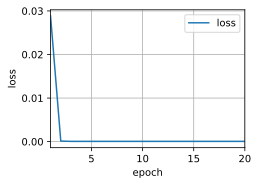

In [74]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

w = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

lr = 0.03
num_epochs = 20
net = d2l.linreg
loss = d2l.squared_loss
batch_size = 10
animator = d2l.Animator(xlabel="epoch", ylabel="loss", xlim=[1, num_epochs], legend=["loss"])

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) 
        l.sum().backward()
        d2l.sgd([w, b], lr, batch_size) 
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        animator.add(epoch+1, [train_l.mean()])

print(w, b)

2. 假设试图为电压和电流的关系建立一个模型。自动微分可以用来学习模型的参数吗?

    电压$U$和电流$I$是线性关系

    $$U=w^\top I + b$$

    可以通过自动微分来学习模型的参数。

4. 计算二阶导数时可能会遇到什么问题？这些问题可以如何解决？

    前向累积时，会构建计算图记录所有的操作子以及该操作子的梯度计算方式，反向传播就是递归调用每个操作子上的梯度计算的代码。

    比如如下代码

    $$z=\boldsymbol{x}^\top\boldsymbol{y}\quad, w=z^2$$

    那么反向传播的计算步骤为

    $$\begin{aligned}
    \frac{\partial (w)}{\partial (z)} &=2z \\
    \frac{\partial (w)}{\partial (\boldsymbol{x})}=\frac{\partial (w)}{\partial (z)}\frac{\partial (z)}{\partial (\boldsymbol{x})}&=2z\boldsymbol{y} \\
    \frac{\partial (w)}{\partial (\boldsymbol{y})}=\frac{\partial (w)}{\partial (z)}\frac{\partial (z)}{\partial (\boldsymbol{y})}&=2z\boldsymbol{x} \\
    \end{aligned}$$

    根据上述计算过程可以构造计算图，这里以$\frac{\partial (w)}{\partial (\boldsymbol{x})}$为例，如下图。

    由于$\frac{\partial (w)}{\partial (\boldsymbol{x})}$是一个向量

    $$\begin{bmatrix}
    \frac{\partial w}{\partial x_1} \\
    \frac{\partial w}{\partial x_2}
    \end{bmatrix}$$

    根据[反向传播](./introduction.ipynb)的计算逻辑，如果需要计算$\frac{\partial w}{\partial x_1}$的二阶导，在调用`backward`时需要传入$[1, 0]$。

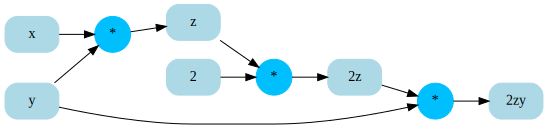

In [42]:
G = graphviz.Digraph()
G.attr(rankdir="LR")
G.attr("node", style="filled")
for i in ['x', 'y', 'z', '2', '2z', '2zy']:
    G.node(i, shape="Mrecord", color="lightblue")
for i, j in enumerate(['*', '*', '*']):
    G.node(f"{j}{i}", label=j, shape="circle", color="deepskyblue")
for i, j in zip(['x', 'y', "*0", "z", "2", "*1", "2z", "y", "*2"], ["*0", "*0", "z", "*1", "*1", "2z", "*2", "*2", "2zy"]):
    G.edge(i, j)
G

In [33]:
x = torch.tensor([3.0, 1.0], requires_grad=True)
y = torch.tensor([1.0, 2.0], requires_grad=True)
z = torch.matmul(x, y)
w = z ** 2
w.backward(create_graph=True)
print("1-order:", x.grad, y.grad)
x_grad = x.grad
x.grad.data.zero_(), y.grad.data.zero_()
x_grad.backward(torch.tensor([1, 0]))
print("2-order:", x.grad, y.grad)

1-order: tensor([10., 20.], grad_fn=<CopyBackwards>) tensor([30., 10.], grad_fn=<CopyBackwards>)
2-order: tensor([2., 4.], grad_fn=<CopyBackwards>) tensor([16.,  2.], grad_fn=<CopyBackwards>)


5. 为什么在squared_loss函数中需要使用reshape函数？

    `reshape`是保证`y`和`y_hat`有一样的形状，避免发生广播现象，下面的示例，由于缺失`reshape`，发生广播现象，导致结果是一个$3\times 3$的矩阵。

In [43]:
y_true = torch.tensor([1, 2, 3])
y_pred = torch.tensor([4, 5, 6])
y_pred = y_pred.reshape(-1, 1)
(y_pred - y_true)**2/2

tensor([[ 4.5000,  2.0000,  0.5000],
        [ 8.0000,  4.5000,  2.0000],
        [12.5000,  8.0000,  4.5000]])

6. 尝试使用不同的学习率，观察损失函数值下降的快慢。

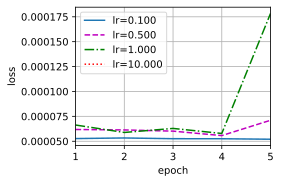

In [73]:
w = torch.normal(0, 0.01, (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

lrs = [0.1, 0.5, 1, 10]
legend = [f"lr={l:.3f}" for l in lrs]
num_epochs = 5
net = d2l.linreg
loss = d2l.squared_loss
animator = DummyAnimator(xlabel="epoch", ylabel="loss", xlim=[1, num_epochs], legend=legend)

for i, lr in enumerate(lrs):
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            l = loss(net(X, w, b), y) 
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size) 
        with torch.no_grad():
            train_l = loss(net(features, w, b), labels)
            animator.add_with_index(epoch+1, train_l.mean(), i)

7. 如果样本个数不能被批量大小整除，data_iter函数的行为会有什么变化？

    最后一个batch不足批量大小。

## 3.3 线性回归的简洁实现


1. 如果将小批量的总损失替换为小批量损失的平均值，需要如何更改学习率？

    注意[`nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)默认行为就是求平均值。如果更改为求和，那么梯度变化，此时学习率需要除以`batch_size`。

In [67]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
y = torch.tensor([1, 2, 3], dtype=torch.float32)
y_hat = x ** 2
l = nn.MSELoss()(y, y_hat)
l.backward(retain_graph=True)
print(x.grad)
x.grad.zero_()
l = nn.MSELoss(reduction="sum")(y, y_hat)
l.backward()
print(x.grad, x.grad/3)

tensor([-0.0000, -1.3333,  2.6667])
tensor([ 0., -4.,  8.]) tensor([ 0.0000, -1.3333,  2.6667])


2. 查看深度学习框架文档，它们提供了哪些损失函数和初始化方法？用Huber损失代替原损失，即
    $$l(y,y') = \begin{cases}|y-y'| -\frac{\sigma}{2} & \text{ if } |y-y'| > \sigma \\ \frac{1}{2 \sigma} (y-y')^2 & \text{ 其它情况}\end{cases}$$

    [这里](https://pytorch.org/docs/stable/nn.html#loss-functions)是PyTorch当前支持的所有损失函数。

    [Huber损失](https://pytorch.org/docs/stable/generated/torch.nn.HuberLoss.html#torch.nn.HuberLoss)有一个超参数$\sigma$，当$|x_n - y_n| \lt \sigma$时才会使用平方误差，避免一些异常点对梯度造成较大影响。

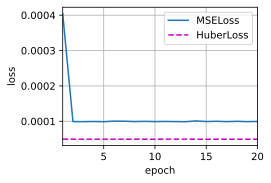

In [80]:
features, labels = d2l.synthetic_data(true_w, true_b, 1000)
data_iter = d2l.load_array((features, labels), batch_size)
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
loss = nn.HuberLoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
num_epochs = 20
animator = DummyAnimator(xlabel="epoch", ylabel="loss", xlim=[1, num_epochs], legend=["MSELoss", "HuberLoss"])
for i, loss in enumerate([nn.MSELoss(), nn.HuberLoss()]):
    for epoch in range(num_epochs):
        for X, y in data_iter:
            l = loss(net(X) ,y)
            trainer.zero_grad()
            l.backward()
            trainer.step()
        l = loss(net(features), labels)
        animator.add_with_index(epoch+1, l.item(), i)

3. 如何访问线性回归的梯度？

In [81]:
net[0].weight.grad

tensor([[-0.0009,  0.0004]])

## 3.4 softmax回归


1. 我们可以更深入地探讨指数族与softmax之间的联系。
    - 计算softmax交叉熵损失$l(\mathbf{y},\hat{\mathbf{y}})$的二阶导数。
    - 计算$\mathrm{softmax}(\mathbf{o})$给出的分布方差，并与上面计算的二阶导数匹配。

    $\mathrm{softmax}$操作子为，

    $$\hat{\mathbf{y}}=\mathrm{softmax}(\mathbf{o})\quad, \hat{y}_j=\frac{\exp (o_j)}{\sum_{k=1}^{q} \exp(o_k)}$$

    其中$q$为类别总数，$o_j$为第$j$类的输出。
    
    交叉熵损失为

    $$\begin{aligned}
    l(\mathbf{y}, \hat{\mathbf{y}}) &= -\sum_{j=1}^{q}y_j \log \frac{\exp(o_j)}{\sum_{k=1}{q} \exp(o_k)} \\
    &= \sum_{j=1}^{q} y_j \log \sum_{k=1}^{q} \exp(o_k) - \sum_{j=1}^{q} y_jo_j \\
    &= \log \sum_{k=1}^{q}\exp(o_k) - \sum_{j=1}^{q}y_j o_j
    \end{aligned}$$

    其中$\mathbf{y}$为独热编码。

    对其求$o_j$的一阶导数为

    $$\begin{aligned}
    \frac{\partial l}{\partial o_j} &= \frac{\exp(o_j)}{\sum_{k=1}^{q} \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j
    \end{aligned}$$

    继续求对$o_j$的二阶导数

    $$\begin{aligned}
    \frac{\partial^2 l}{\partial o_j^2} &= \frac{\sum_{k=1}^{q} \exp(o_k) - \exp(o_j)^2}{(\sum_{k=1}^{q} \exp(o_k))^2} \\
    &= \mathrm{softmax}(\mathbf{o})_j-(\mathrm{softmax}(\mathbf{o})_j)^2 \\
    &= \mathrm{softmax}(\mathbf{o})_j(1-\mathrm{softmax}(\mathbf{o})_j)
    \end{aligned}$$

    根据[方差](../SupervisedLearning/theory.ipynb)的定义

    $$\begin{aligned}
    \mathrm{Var}({\mathrm{softmax(\mathbf{o})}}) &= \frac{1}{q}\sum_{j=1}^{q}(\mathrm{softmax}(\mathbf{o})_j - E(\mathrm{softmax}(\mathbf{o})_j))^2 \\
    &= \frac{1}{q}\sum_{j=1}^{q}(\mathrm{softmax}(\mathbf{o})_j - \frac{1}{q}\sum_{j=1}^{q}(\mathrm{softmax}(\mathbf{o})_j))^2 \\
    &= \frac{1}{q}\sum_{j=1}^{q}(\mathrm{softmax}(\mathbf{o})_j-\frac{1}{q})^2 \\
    &= \frac{1}{q}\sum_{j=1}^{q}(\mathrm{softmax}(\mathbf{o})_j)^2 - \frac{2}{q}\sum_{j=1}^{q} \frac{\mathrm{softmax}(\mathbf{o})_j}{q} + \frac{1}{q^2} \\
    &= \frac{1}{q}\sum_{j=1}^{q}(\mathrm{softmax}(\mathbf{o})_j)^2 - \frac{1}{q} \sum_{j=1}^{q} \mathrm{softmax}(\mathbf{o})_j + \frac{1}{q} \sum_{j=1}^{q} \mathrm{softmax}(\mathbf{o})_j - \frac{2}{q}\sum_{j=1}^{q} \frac{\mathrm{softmax}(\mathbf{o})_j}{q} + \frac{1}{q^2} \\
    &= \frac{1}{q} \sum_{j=1}^{q}((\mathrm{softmax}(\mathbf{o})_j)^2-\mathrm{softmax}(\mathbf{o})) + \frac{1}{q} - \frac{1}{q^2} \\
    &= -\frac{1}{q} \sum_{j=1}^{q} \frac{\partial^2 l}{\partial o_j^2} + \frac{1}{q} - \frac{1}{q^2}
    \end{aligned}$$

2. 假设我们有三个类发生的概率相等，即概率向量是$(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$。
    - 如果我们尝试为它设计二进制代码，有什么问题？
    - 请设计一个更好的代码。提示：如果我们尝试编码两个独立的观察结果会发生什么？如果我们联合编码$n$个观测值怎么办？

    使用二进制代码，至少需要两位，$00, 01, 10, 11$分别表示不同的类别，由于只有三种类，所以有一种组合会浪费。

    如果有两个独立的观察结果，那么总共有四种可能

    $$(0, 0), (0, 1), (1, 0), (1, 1)$$

    可以使用长度为2的二进制编码来表示上述四种可能，具体来说

    $$\begin{aligned}
    (0, 0) &\rightarrow 0 \\
    (0, 1) &\rightarrow 1 \\
    (1, 0) &\rightarrow 2 \\
    (1, 1) &\rightarrow 3 \\
    \end{aligned}$$

3. softmax是对上面介绍的映射的误称（虽然深度学习领域中很多人都使用这个名字）。真正的softmax被定义为$\mathrm{RealSoftMax}(a, b) = \log (\exp(a) + \exp(b))$。
    - 证明$\mathrm{RealSoftMax}(a, b) > \mathrm{max}(a, b)$。
    - 证明$\lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) > \mathrm{max}(a, b)$成立，前提是$\lambda > 0$。
    - 证明对于$\lambda \to \infty$，有$\lambda^{-1} \mathrm{RealSoftMax}(\lambda a, \lambda b) \to \mathrm{max}(a, b)$。
    - soft-min会是什么样子？
    - 将其扩展到两个以上的数字。

    $$\begin{aligned}
    \mathrm{RealSoftMax}(a, b) &= \log (\exp(a) + \exp(b)) \\
    &> \mathrm{max}(\log(\exp(a)), \log(\exp(b))) \\
    &= \mathrm{max}(a, b)
    \end{aligned}$$

    $$
    \begin{aligned}
    \lambda^{-1}\mathrm{RealSoftMax}(\lambda a, \lambda b) &= \lambda^{-1}\log(\exp(\lambda a) + \exp(\lambda b)) \\
    &> \mathrm{max}(\lambda^{-1} \log{\exp(\lambda a)}, \lambda^{-1} \log{\exp(\lambda b)}) \\
    &= \mathrm{max}(a, b)
    \end{aligned}
    $$

    $$
    c \leftarrow \mathrm{max}(a, b) \\
    \begin{aligned}
    \lambda^{-1} \log \exp(\lambda c) \lt \lambda^{-1}\log(\exp(\lambda a) + \exp(\lambda b)) &\lt \lambda^{-1}\log(\exp(\lambda c) + \exp(\lambda c)) \\
    &= \frac{\log 2}{\lambda} + \lambda^{-1}\log(\exp (\lambda c))
    \end{aligned} \\
    \operatorname*{lim}_{\lambda \rightarrow \infty} \frac{\log 2}{\lambda} = 0 \\
    c \lt \lambda^{-1}\log(\exp(\lambda a) + \exp(\lambda b)) \lt c \rightarrow \lambda^{-1}\log(\exp(\lambda a) + \exp(\lambda b)) \lt \mathrm{max}(a, b)
    $$

    $$
    \mathrm{softmin}(\mathbf{o})_j=\frac{\exp(-o_j)}{\sum_{k=1}^{q}\exp(-o_k)}
    $$

    $$
    \mathrm{RealSoftMax}(a, b, c \cdots) = \log(\exp(a) + \exp(b) + \exp(c) + \cdots)
    $$

## 3.5 图像分类数据集


1. 减少batch_size（如减少到1）是否会影响读取性能？


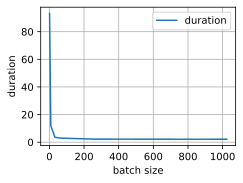

In [3]:
batch_size_list = [1, 8, 32, 64, 256, 512, 1024]
animator = d2l.Animator(xlabel="batch size", ylabel="duration", legend=["duration"])
for batch_size in batch_size_list:
    train_iter, _ = d2l.load_data_fashion_mnist(batch_size=batch_size)
    timer = d2l.Timer()
    for X, y in train_iter:
        continue
    animator.add(batch_size, timer.stop())

2. 数据迭代器的性能非常重要。当前的实现足够快吗？探索各种选择来改进它。

    PyTorch的[官方文档](https://pytorch.org/docs/stable/data.html)介绍了DataLoader，DataLoader有三个选项和性能有关

    - `num_workers`: 读取数据的进程数量
    - `pin_memory`: 是否需要将tensor放在固定区域，能够异步地将tensor放到GPU设备上
    - `persistent_workers`: 读取数据的进程常驻

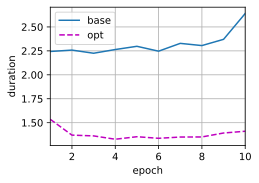

In [16]:
train_dataset = torchvision.datasets.FashionMNIST(root="../data", train=True, 
                                                  transform=transforms.ToTensor(), download=True)
base_train_iter = data.DataLoader(train_dataset, batch_size=256, shuffle=True, 
                                  num_workers=d2l.get_dataloader_workers())
opt_train_iter = data.DataLoader(train_dataset, batch_size=256, shuffle=True, 
                                 num_workers=d2l.get_dataloader_workers() * 2, persistent_workers=True)
num_epochs = 10
animator = d2l.Animator(xlabel="epoch", ylabel="duration", legend=["base", "opt"], xlim=[1, num_epochs])
for epoch in range(num_epochs):
    timer = d2l.Timer()
    for X, y in base_train_iter:
        continue
    base = timer.stop()
    timer.start()
    for X, y in opt_train_iter:
        continue
    opt = timer.stop()
    animator.add(epoch+1, [base, opt])

3. 查阅框架的在线API文档。还有哪些其他数据集可用？

    [torchvision](https://pytorch.org/vision/stable/datasets.html#built-in-datasets)

## 3.6 softmax回归的从零开始实现

1. 本节直接实现了基于数学定义softmax运算的softmax函数。这可能会导致什么问题？提示：尝试计算$\exp(50)$的大小

    可能会出现溢出(overflow)，导致结果时`nan`。

In [25]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制
X = torch.arange(100, 105, dtype=torch.float32).reshape(1, -1)
y = softmax(X)
print(y, y.sum())

tensor([[nan, nan, nan, nan, nan]]) tensor(nan)


2. 本节中的函数cross_entropy是根据交叉熵损失函数的定义实现的。它可能有什么问题？提示：考虑对数的定义域。

    当$\mathrm{softmax}(\mathbf{o})_j \rightarrow 0$时，在求交叉熵时可能会得到inf。

In [55]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

X = torch.tensor([1, 100], dtype=torch.float32).reshape(1, -1)
y_hat = softmax(X)
print(y_hat)
y = torch.tensor([0]).reshape(1, -1)
cross_entropy(y_hat, y)

tensor([[0., nan]])


(tensor([[inf]]), tensor([[0.]]))

3. 请想一个解决方案来解决上述两个问题。

    $\mathrm{softmax}$函数中使用$\exp(x)$，如果$x$比较大可能会导致溢出(overflow)，这样会使得分母或者分子变为无穷大(inf)，最后得到的数字可能是0、inf或者NAN。可以通过如下技巧来计算$\hat{y}_j$

    $$\begin{aligned}
    \hat{y}_j &= \frac{\exp(o_j-\mathrm{max}(o_k))\exp(\mathrm{max}(o_k))}{\sum_k \exp(o_k - \mathrm{max}(o_k))}\exp(\mathrm{o_k}) \\
    &= \frac{\exp(o_j - \mathrm{max}(o_k))}{\sum_k \exp(o_k - \mathrm{max}(o_k))}
    \end{aligned}$$

    由于$\exp(x)$，其中$x$可能会存在很小的数，导致$\exp(x)$接近零，因此在计算交叉熵时求对数可能会得到-inf，可以通过下面的变形来计算交叉熵

    $$\begin{aligned}
    \log(\hat{y}_j) &= \log(\frac{\exp(o_j-\max(o_k))}{\sum_k \exp(o_k - \max(o_k))}) \\
    &= \log(\exp(o_j-\max(o_k)))-\log(\sum_k\exp(o_k - \max(o_k))) \\
    &= o_j - \max(o_k)-\log(\sum_k\exp(o_k-\max(o_k)))
    \end{aligned}$$

5. 假设我们使用softmax回归来预测下一个单词，可选取的单词数过多可能会带来哪些问题?

    单词数过大会导致$\mathbf{o}$的维数更多，那么模型会更加复杂，计算量更大，其次由于类别较多，每种类别的概率可能都比较小，期望时$\frac{1}{q}$，其中$q$是类别数量，因此概率可能都$\rightarrow 0$，难以抉择结果。

## 3.7 softmax回归的简洁实现

1. 尝试调整超参数，例如批量大小、迭代周期数和学习率，并查看结果。

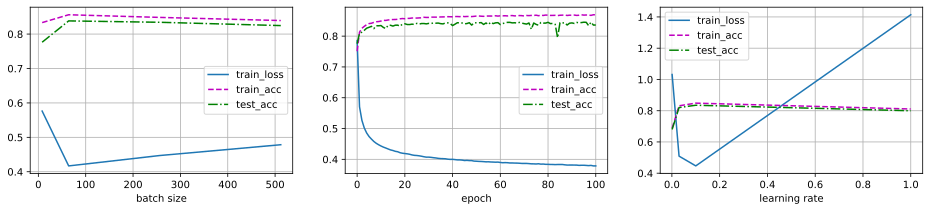

In [68]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = d2l.Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), d2l.accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

def evaluate_accuracy(net, data_iter):  #@save
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = d2l.Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater, need_plot=False):  #@save
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        if need_plot:
            animator.add(epoch, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    return train_loss, train_acc, test_acc

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

batch_size_list = [8, 64, 256, 512]
epoch_list = [100]
lr_list = [0.001, 0.03, 0.1, 1]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 3))
xlabel = ["batch size", "epoch", "learning rate"]
def batch_test(batch_size):
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)
    return train_iter, test_iter, 10, torch.optim.SGD(net.parameters(), lr=0.1), False
def epoch_test(epoch):
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=256)
    return train_iter, test_iter, epoch, torch.optim.SGD(net.parameters(), lr=0.1), True
def lr_test(lr):
    train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=256)
    return train_iter, test_iter, 10, torch.optim.SGD(net.parameters(), lr=lr), False
idx = 0
for a, b, c in zip((batch_size_list, epoch_list, lr_list), (batch_test, epoch_test, lr_test), xlabel):
    animator = DummyAnimator(xlabel=c, legend=["train_loss", "train_acc", "test_acc"], fig=fig, ax=axes[idx])
    idx += 1
    for d in a:
        net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
        net.apply(init_weights)
        loss = nn.CrossEntropyLoss(reduction='none')
        train_iter, test_iter, epoch, updater, need_plo = b(d)
        train_loss, train_acc, test_acc = train_ch3(net, train_iter, test_iter, loss, epoch, updater)
        animator.add(d, [train_loss, train_acc, test_acc])